In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [6]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
degree = 15 # Overfitting eğilimli bir derece seçiyoruz
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

In [8]:
# --- Normal Doğrusal Regresyon (Overfitting Gösterimi) ---
linear_model = LinearRegression()
linear_model.fit(X_poly_train, y_train)

y_train_pred_linear = linear_model.predict(X_poly_train)
y_test_pred_linear = linear_model.predict(X_poly_test)

train_mse_linear = mean_squared_error(y_train, y_train_pred_linear)
test_mse_linear = mean_squared_error(y_test, y_test_pred_linear)

In [9]:
print("--- Normal Doğrusal Regresyon (Derece 15) ---")
print(f"Eğitim MSE: {train_mse_linear:.4f}")
print(f"Test MSE: {test_mse_linear:.4f}")
print(f"Katsayıların Ortalama Mutlak Değeri: {np.mean(np.abs(linear_model.coef_)):.4f}")

--- Normal Doğrusal Regresyon (Derece 15) ---
Eğitim MSE: 0.0072
Test MSE: 0.0113
Katsayıların Ortalama Mutlak Değeri: 189.2212


In [10]:
ridge_model = Ridge(alpha=0.1) # Küçük bir alpha değeri ile başlıyoruz
ridge_model.fit(X_poly_train, y_train)

D:\Anaconda_Yeni_Kurulum\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.02211e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.1)

In [11]:
y_train_pred_ridge = ridge_model.predict(X_poly_train)
y_test_pred_ridge = ridge_model.predict(X_poly_test)

train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)

print("\n--- Ridge Regresyon (Derece 15, alpha=0.1) ---")
print(f"Eğitim MSE: {train_mse_ridge:.4f}")
print(f"Test MSE: {test_mse_ridge:.4f}")
print(f"Katsayıların Ortalama Mutlak Değeri: {np.mean(np.abs(ridge_model.coef_)):.4f}")


--- Ridge Regresyon (Derece 15, alpha=0.1) ---
Eğitim MSE: 0.0083
Test MSE: 0.0117
Katsayıların Ortalama Mutlak Değeri: 0.0798


In [12]:
# --- Daha Yüksek Alpha ile Ridge Regresyon (Daha Fazla Düzenlileştirme) ---
ridge_model_high_alpha = Ridge(alpha=100) # Çok daha yüksek bir alpha değeri
ridge_model_high_alpha.fit(X_poly_train, y_train)

y_train_pred_high_alpha = ridge_model_high_alpha.predict(X_poly_train)
y_test_pred_high_alpha = ridge_model_high_alpha.predict(X_poly_test)

train_mse_high_alpha = mean_squared_error(y_train, y_train_pred_high_alpha)
test_mse_high_alpha = mean_squared_error(y_test, y_test_pred_high_alpha)

print("\n--- Ridge Regresyon (Derece 15, alpha=100) ---")
print(f"Eğitim MSE: {train_mse_high_alpha:.4f}")
print(f"Test MSE: {test_mse_high_alpha:.4f}")
print(f"Katsayıların Ortalama Mutlak Değeri: {np.mean(np.abs(ridge_model_high_alpha.coef_)):.4f}")


--- Ridge Regresyon (Derece 15, alpha=100) ---
Eğitim MSE: 0.0277
Test MSE: 0.0299
Katsayıların Ortalama Mutlak Değeri: 0.0085


D:\Anaconda_Yeni_Kurulum\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.88913e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [13]:
# --- Görselleştirme ---
plt.figure(figsize=(15, 5))


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

(-1.5, 1.5)

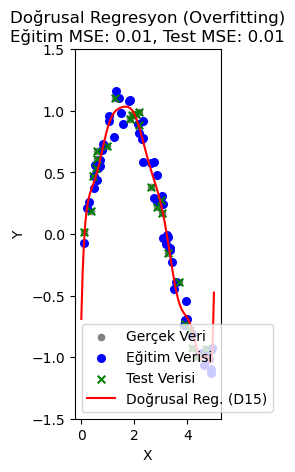

In [14]:
# Normal Doğrusal Regresyon
plt.subplot(1, 3, 1)
plt.scatter(X, y, s=20, label="Gerçek Veri", color='gray')
plt.scatter(X_train, y_train, s=30, label="Eğitim Verisi", color='blue')
plt.scatter(X_test, y_test, s=30, label="Test Verisi", color='green', marker='x')
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot_pred_linear = linear_model.predict(X_plot_poly)
plt.plot(X_plot, y_plot_pred_linear, color='red', label=f"Doğrusal Reg. (D{degree})")
plt.title(f"Doğrusal Regresyon (Overfitting)\nEğitim MSE: {train_mse_linear:.2f}, Test MSE: {test_mse_linear:.2f}")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.ylim(-1.5, 1.5)

(-1.5, 1.5)

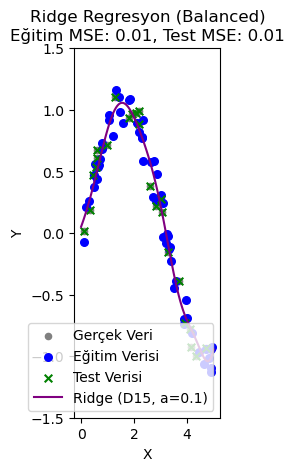

In [16]:
# Ridge Regresyon (alpha=0.1)
plt.subplot(1, 3, 2)
plt.scatter(X, y, s=20, label="Gerçek Veri", color='gray')
plt.scatter(X_train, y_train, s=30, label="Eğitim Verisi", color='blue')
plt.scatter(X_test, y_test, s=30, label="Test Verisi", color='green', marker='x')
y_plot_pred_ridge = ridge_model.predict(X_plot_poly)
plt.plot(X_plot, y_plot_pred_ridge, color='purple', label=f"Ridge (D{degree}, a=0.1)")
plt.title(f"Ridge Regresyon (Balanced)\nEğitim MSE: {train_mse_ridge:.2f}, Test MSE: {test_mse_ridge:.2f}")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.ylim(-1.5, 1.5)

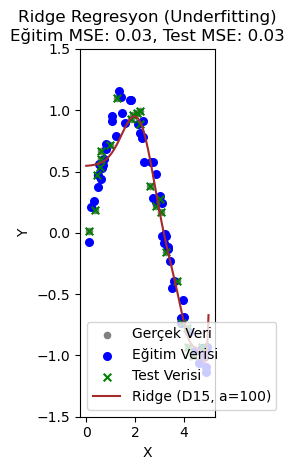


--- Ridge Regresyon Yorumlama ---
Normal Doğrusal Regresyon (Derece 15): Overfitting eğilimi gösterir. Eğitim hatası düşük, test hatası yüksek.
Ridge Regresyon (alpha=0.1): Düzenlileştirme sayesinde overfitting azaltılır. Test hatası düşer, model genelleme yapabilir.
Ridge Regresyon (alpha=100): Aşırı düzenlileştirme nedeniyle model underfitting eğilimi gösterir. Hem eğitim hem de test hatası yüksek, modelin genelleme yeteneği azalır.
Alpha değeri (lambda) doğru ayarlandığında, Ridge overfitting'i dengeleyerek daha iyi bir genellenebilir model sağlar.


In [17]:
# Ridge Regresyon (alpha=100) - Over-regularized
plt.subplot(1, 3, 3)
plt.scatter(X, y, s=20, label="Gerçek Veri", color='gray')
plt.scatter(X_train, y_train, s=30, label="Eğitim Verisi", color='blue')
plt.scatter(X_test, y_test, s=30, label="Test Verisi", color='green', marker='x')
y_plot_pred_high_alpha = ridge_model_high_alpha.predict(X_plot_poly)
plt.plot(X_plot, y_plot_pred_high_alpha, color='brown', label=f"Ridge (D{degree}, a=100)")
plt.title(f"Ridge Regresyon (Underfitting)\nEğitim MSE: {train_mse_high_alpha:.2f}, Test MSE: {test_mse_high_alpha:.2f}")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()

print("\n--- Ridge Regresyon Yorumlama ---")
print("Normal Doğrusal Regresyon (Derece 15): Overfitting eğilimi gösterir. Eğitim hatası düşük, test hatası yüksek.")
print("Ridge Regresyon (alpha=0.1): Düzenlileştirme sayesinde overfitting azaltılır. Test hatası düşer, model genelleme yapabilir.")
print("Ridge Regresyon (alpha=100): Aşırı düzenlileştirme nedeniyle model underfitting eğilimi gösterir. Hem eğitim hem de test hatası yüksek, modelin genelleme yeteneği azalır.")
print("Alpha değeri (lambda) doğru ayarlandığında, Ridge overfitting'i dengeleyerek daha iyi bir genellenebilir model sağlar.")